CMP6202

# Objectives
In this lab you will:
* Implement Naive Bayes Algorthim
* Implement the K-Nearest Neighbor(KNN) algorithm for data analysis and prediction
* Cross-validation
* KFold
* StratifiedKFold



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Classification Algorithms

## Naive Bayesian Classifiers

### Conditional Probability

Most of us will already be familiar with the notion of the probability of a specific event, for example the probability that a transaction is fraudulent might be 5% - this is pretty easy to understand. But how might we calculate the probability that a transaction is fraudulent given that a pre-paid card is used? To handle this more complicated case we utilise a special branch of probability theory called conditional probability.

We can specify this using the following formula

$P(A|B) = \frac{P(A \cap B)}{P(B)}$

In other words:
* $P(A|B)$
  * The probability of observing A given we have observed B
* $P(A \cap B)$
  * The probability of both A **and** B being observed / occurring
* $P(B)$
  * The probability of B occurring











Based on our fraudulent transaction example it would look something like this:
$P(Fraud|Prepaid) = \frac{P(Fraud \cap Prepaid)}{P(Fraud)}$

This would allow us to measure the probability of a transaction being fraudulent given that the transaction involved a prepaid card and it works... if you know the probability of $Fraud \cap Prepaid$

In [4]:
# We can show the set intersection operation '∩' in Python as follows
# {1,2,3,4,5} ∩ {2,4,6} = {2,4}
# The intersection operation is like "ANDing" together sets,
# so we can use the & operator to find the intersection
set([1,2,3,4,5]) & set([2,4,6])

{2, 4}

In [5]:
# We can show the set union operation '∪' in Python as follows
# {1,2,3,4,5} ∪ {2,4,6} = {1,2,3,4,5,6}
# The intersection operation is like "ORing" together sets,
# so we can use the | operator to find the intersection
set([1,2,3,4,5]) | set([2,4,6])

{1, 2, 3, 4, 5, 6}

In [6]:
# Using this we can now calculate the probability of A given B
# P(A|B)

a = set([1,2,3])
b = set([1,4,5])
total_vals = 6.0
# P(A ∩ B)
p_a_and_b = len(a & b) / total_vals
# P(B)
p_b = len(b) / total_vals

# The probability of A happening given that B has happened / been observed
# Is the probability of A and B happening,
# divided by the probability of B happening
# P(A|B) = P(A ∩ B) / P(B)
p_a_given_b = p_a_and_b / p_b
p_a_given_b

0.3333333333333333

We may encounter the issue in real world probability calculations where calculating $P(A | B)$ is quite hard, to do this we will use a specific trick in probability that allows us to **"invert"** our conditional probability calculations.

This method of inverting conditional probability calculations can be specified as follows
$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$

If we expand this out we get:
$P(B|A) = \frac{P(A \cap B) P(B)}{\frac{P(B)}{P(A)}} = \frac{P(A \cap B)}{P(A)}$

Because the $P(B)$ terms in the equation cancel out.



Remember we said before that in our example the probability of a fraudulent transaction might be 5%?
$P(Fraud) = 5\%$

Let's say the probability of a transaction using a prepaid card is also 5%

$P(Prepaid) = 5\%$

And, based on **previous data we have observed**, the probability of someone using a prepaid card in a fraudulent order is 65%.  

$P(Prepaid | Fraud) = 65\%$

So based on our Fraudulent transaction example, we can calculate the probability of a fraudulent transaction given we have observed they are using a prepaid card as follows:
$P(Fraud|Prepaid) = \frac{P(Prepaid|Fraud) P(Fraud)}{P(Prepaid)}$

Or, when replacing it with the specific probability values:

$P(Fraud|Prepaid) = \frac{65\% \times 5\%}{5\%} = 65\%$

To talk about this in realistic terms again, if we had 1000 transactions then based on
$P(Fraud) = 5\%$

50 transactions would be frauduluent
and based on
$P(Prepaid) = 5\%$



### Terminology

We call this equation [Bayes Theorem](https://simple.wikipedia.org/wiki/Bayes'_theorem), named after the [Reverend Thomas Bayes](https://en.wikipedia.org/wiki/Thomas_Bayes) an 18th Century English Statistician, Philosopher and Minister whose work in the area of probability would go on to spark a whole [branch of the field](https://en.wikipedia.org/wiki/Bayesian_probability) competing to this day with the [Frequentist intepretation](https://en.wikipedia.org/wiki/Frequentist_inference) of probability.

Bayes Theorem can also be stated in a more easy-to-read form as follows:
$P(Outcome|Evidence) = \frac{P(Evidence|Outcome) P(Outcome)}{P(Evidence)}$

In the formula we can interpret these various terms as:

*   $P(Evidence | Outcome)$
  * The probability of seeing a given piece of evidence, given that we know the outcome.
* $P(Outcome)$
  * The probability of observing that outcome at all
* $P(Evidence)$
  * The probability of observing that evidence at all
*   $P(Outcome | Evidence)$
  * The probability of an outcome occuring given the evidence we are aware of.







Where Outcome in our example would be "the transaction is fraudulent" and an example of evidence would be "the customer used a pre-paid card".





## K Nearest Neighbours Classifier

We explored K-Nearest Neighbours for classification previously, but let's take a little deeper look at how it works.

K-Nearest Neighbours is a [distance](https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html) based supervised learning algorithm.

For classification problems KNN works by having a record of existing class labels for previous data points it has encountered during "training".

Note the following images are used courtesy of [IBM's KNN tutorial](https://www.ibm.com/uk-en/topics/knn)

When given a new piece of input data to classify

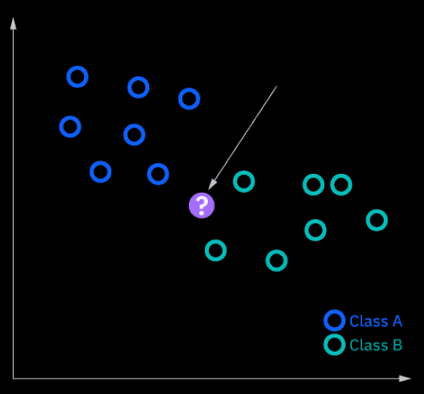

It checks how "far away" that new data point is from the existing data points it has encountered.

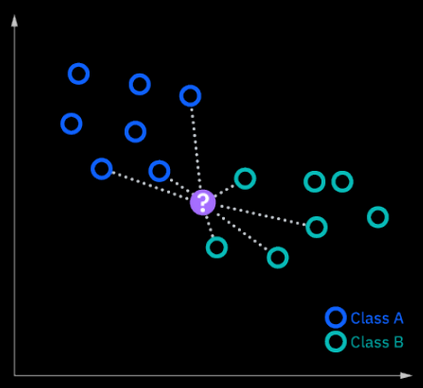

It then selects those 'k' neighbouring data points and performs a majority vote to try to work out what the appropriate class for the data point should be.

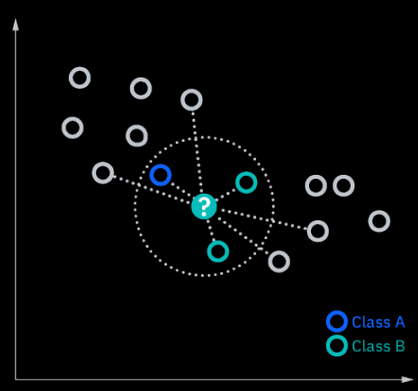

### Calculating Distance
kNN based Machine Learning algorithms are "distance" based, this means they try to judge the appropriate value for a given new data point encountered based on the "distance" of that data point relative to other data points previously seen during the training phase.

# Exploring Classification Algorithms: An In-Depth Analysis of Wine and Heart Disease Datasets

* In this lab, we will be working with two datasets: one on wine and the other on heart disease.
* Our primary objective is to perform essential tasks, including exploratory data analysis (EDA), dataset cleaning, and standardization.
* Additionally, we will divide the dataset into subsets using various techniques such as train_test_split, KFold, and StratifiedKFold.
* Finally, we will apply these datasets to two classification algorithms: Gaussian Naive Bayes (GaussianNB) and K Nearest Neighbors (KNN).
* * Subsequently, we will compare the results obtained from these two algorithms to gain valuable insights.

# [wine.csv](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8493858)

In [7]:
wine = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/wine.csv')


In [8]:
wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,quality_ind
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White,Low
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White,Low
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White,Low
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low


In [9]:
wine.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type', 'quality_ind'],
      dtype='object')

In [10]:
wine.drop ('Unnamed: 0', axis=1, inplace=True)

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
 13  quality_ind           6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [12]:
wine.drop(columns=['type', 'quality_ind'], axis=1, inplace=True)

In [13]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
wine.isna().sum()

,0
fixed.acidity,0
volatile.acidity,0
citric.acid,0
residual.sugar,0
chlorides,0
free.sulfur.dioxide,0
total.sulfur.dioxide,0
density,0
pH,0
sulphates,0


In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


<Axes: xlabel='quality', ylabel='count'>

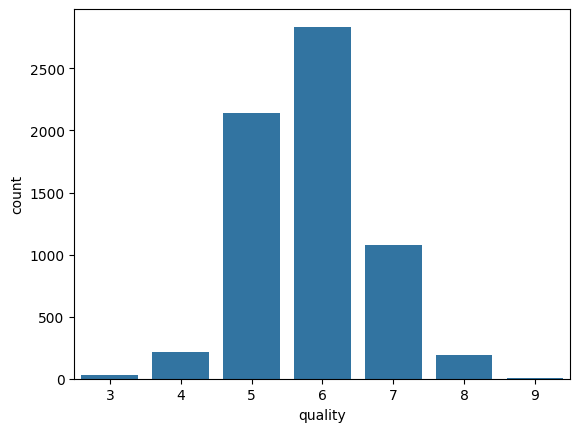

In [16]:
sns.countplot(data = wine, x ='quality')

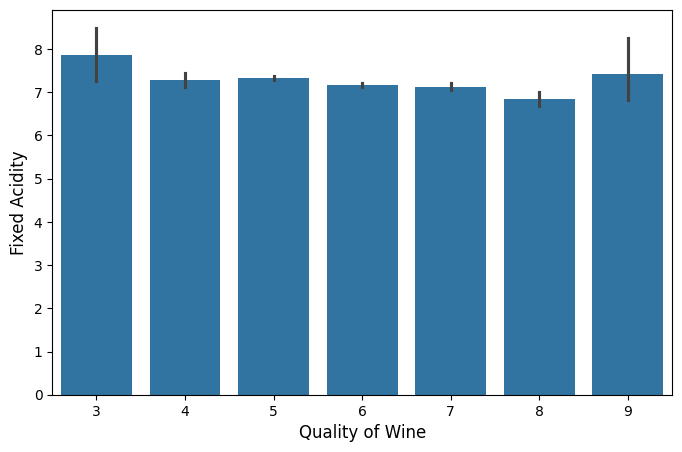

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='fixed.acidity',
            data= wine)

plt.xlabel('Quality of Wine', size = 12)
plt.ylabel('Fixed Acidity', size=12)
plt.show()

### Visualize the relationship between residual sugar and quality of wine

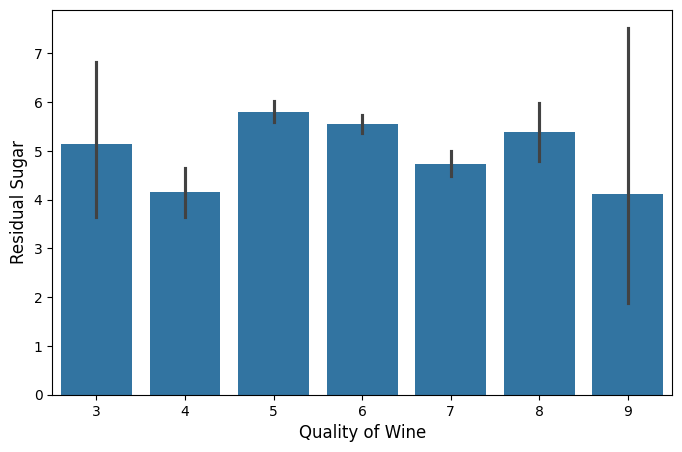

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x='quality',
y='residual.sugar',
data=wine)
plt.xlabel('Quality of Wine', size=12)
plt.ylabel('Residual Sugar', size=12)
plt.show()

##  Visualize the relationship between chlorides and quality of wine.

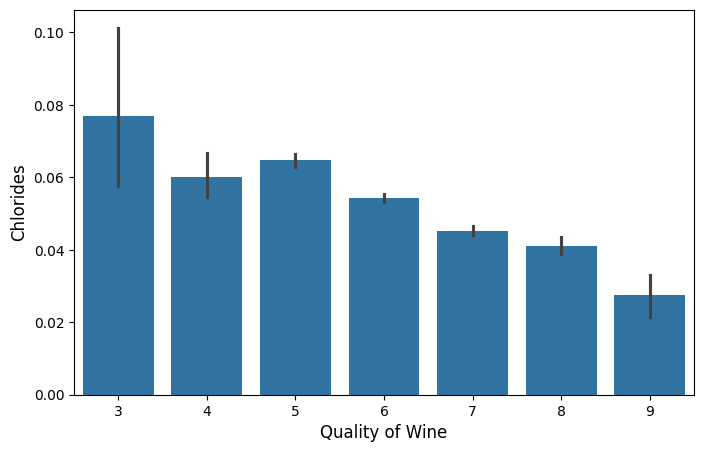

In [19]:
plt.figure(figsize= (8,5))
sns.barplot(x = 'quality',
y='chlorides',
data=wine)
plt.xlabel('Quality of Wine', size =12)
plt.ylabel('Chlorides', size=12)
plt.show()

### Classify win quality into classes of poor and good by assigning ranges for␣ the quality scores
# Wines that have a quality score between 3 and 6 are classified as 0 ('poor').Wines that have a quality score between 7 and 8 are classified as 1 ('good').

In [20]:
wine['quality'] = wine['quality'].replace([3,4,5,6], 0)
wine['quality'] = wine['quality'].replace([7,8,9], 1)

In [21]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [22]:
wine['quality'].value_counts()


,count
quality,
0,5220
1,1277


<Axes: xlabel='quality', ylabel='count'>

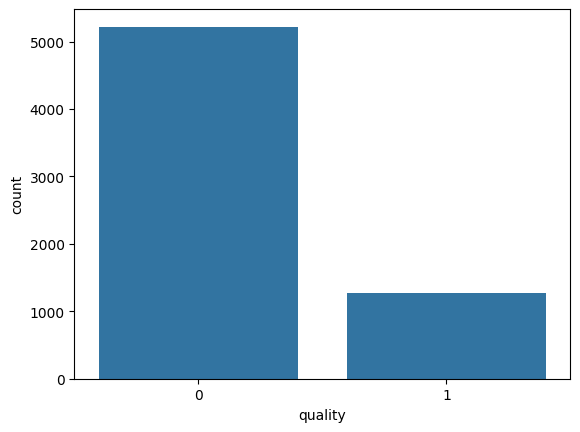

In [23]:
sns.countplot(data = wine, x = 'quality')

### Generate and display correlation matrix for features. We will usethe Pearson Correlation method.


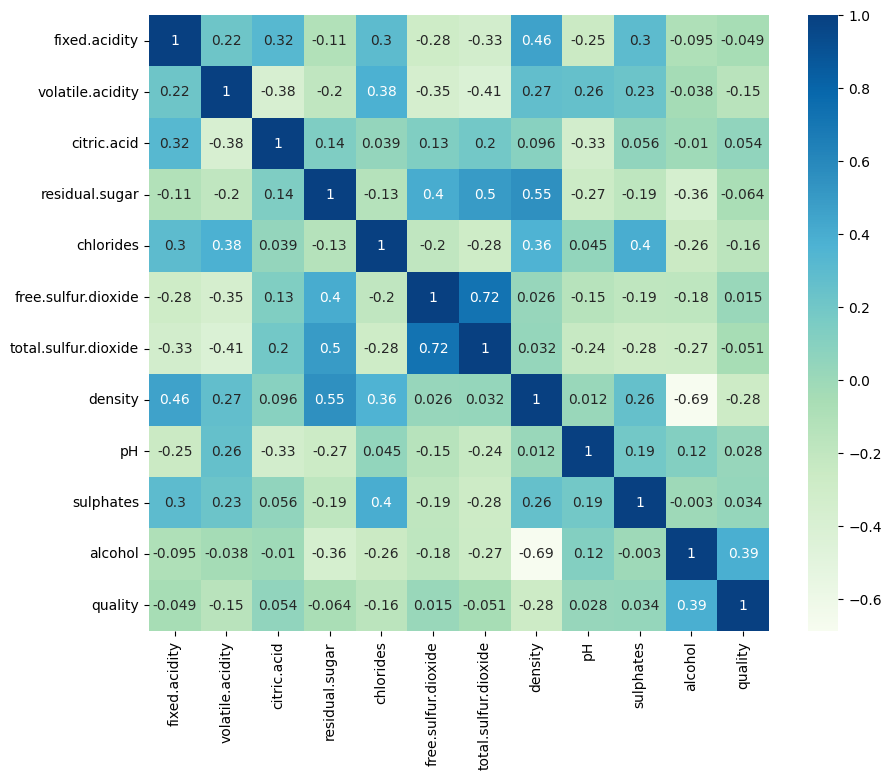

In [24]:
corr =wine.corr()
plt.figure(figsize= (10, 8))
sns.heatmap(corr, annot= True, cmap='GnBu')
plt.show()

In [25]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [26]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
1916,6.6,0.25,0.36,8.1,0.045,54.0,180.0,0.99580,3.08,0.42,9.2
947,8.5,0.16,0.35,1.6,0.039,24.0,147.0,0.99350,2.96,0.36,10.0
877,6.0,0.28,0.34,1.6,0.119,33.0,104.0,0.99210,3.19,0.38,10.2
2927,7.0,0.31,0.31,9.1,0.036,45.0,140.0,0.99216,2.98,0.31,12.0
6063,8.5,0.44,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4


In [29]:
sc = StandardScaler()

In [30]:
X_train = sc.fit_transform(X_train)

In [31]:
X_test = sc.transform(X_test)

In [32]:
X_train

array([[-0.47810509, -0.54303355,  0.27985521, ..., -0.86006706,
        -0.75122123, -1.08506915],
       [ 0.97505476, -1.08615999,  0.21093574, ..., -1.60531829,
        -1.14846347, -0.41405807],
       [-0.93699767, -0.3619914 ,  0.14201627, ..., -0.17692009,
        -1.01604939, -0.24630531],
       ...,
       [ 4.72267752, -0.42233878,  2.07176137, ..., -0.3632329 ,
         0.90395477, -0.66568723],
       [ 1.28098315,  0.36217719,  1.31364722, ...,  0.63043542,
         2.4267167 ,  2.43773898],
       [ 0.66912637, -0.42233878,  0.21093574, ...,  0.00939272,
         0.63912661, -0.07855254]])

In [33]:
# help (StandardScaler)

In [34]:
X_test

array([[-0.1721767 , -0.54303355,  0.90013042, ..., -0.3632329 ,
        -0.35397899,  1.17959322],
       [ 0.28671589, -1.20685476,  2.89879498, ..., -0.92217133,
        -0.88363531,  0.256953  ],
       [-0.78403347, -1.14650738, -0.34042   , ..., -0.61164998,
        -1.01604939, -1.16894553],
       ...,
       [ 0.51616218, -0.12060187,  1.31364722, ..., -1.10848414,
         3.61844342, -1.08506915],
       [ 0.21023379,  1.14669317, -1.78772882, ...,  1.00306103,
         0.37429845,  0.17307661],
       [ 0.05726959,  1.0259984 , -0.96069521, ...,  1.87252081,
         1.30119701, -0.83343999]])

## K Nearest Neighbors Model


In [35]:
clf_knn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print(knn_acc)
print(classification_report(y_test, y_pred))


0.8292307692307692
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1047
           1       0.58      0.46      0.51       253

    accuracy                           0.83      1300
   macro avg       0.73      0.69      0.70      1300
weighted avg       0.82      0.83      0.82      1300



### Naive Bayesian Classifiers

In [36]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_pred = clf_gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred)
print(gnb_acc)
print(classification_report(y_test, y_pred))


0.7753846153846153
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1047
           1       0.45      0.68      0.54       253

    accuracy                           0.78      1300
   macro avg       0.68      0.74      0.70      1300
weighted avg       0.82      0.78      0.79      1300



## Show the accuracy score by Model


In [37]:
models = pd.DataFrame({
    'Model' : ['KNeighbours', 'GaussianNB'],
    'Accuracy_score': [knn_acc, gnb_acc]
})

In [38]:
models

,Model,Accuracy_score
0,KNeighbours,0.829231
1,GaussianNB,0.775385


<Axes: xlabel='Accuracy_score', ylabel='Model'>

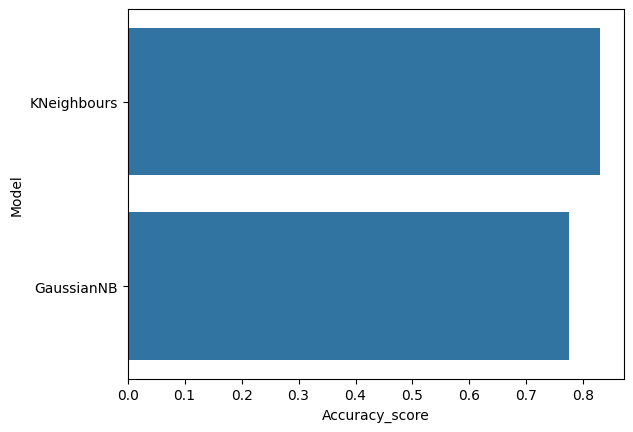

In [39]:
sns.barplot(x='Accuracy_score', y='Model', data=models)

In [40]:
models.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score
0,KNeighbours,0.829231
1,GaussianNB,0.775385


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In this step, we will utilize the cross_val_score function to assess the performance of the **KNeighborsClassifier** and **GaussianNB** classifiers without explicitly specifying a custom **KFold** parameter.

## KNeighborsClassifier with KFold

In [42]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [43]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kf)

array([0.84230769, 0.82980769, 0.85563041, 0.83541867, 0.8373436 ])

In [44]:
np.mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kf))

0.8401016139779374

## GaussianNB with KFold

In [45]:
cross_val_score(GaussianNB(), X_train, y_train, cv=kf)

array([0.75      , 0.74038462, 0.73917228, 0.75264678, 0.75168431])

In [46]:
np.mean(cross_val_score(GaussianNB(), X_train, y_train, cv=kf))

0.7467775968016583

## KNeighborsClassifier with StratifiedKFold

In [47]:
from sklearn.model_selection import StratifiedKFold

In [48]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [49]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=skf)

array([0.8375    , 0.84230769, 0.84889317, 0.81424447, 0.83445621])

In [50]:
np.mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=skf))

0.8354803065077367

## GaussianNB with StratifiedKFold

In [51]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [52]:
cross_val_score(GaussianNB(), X_train, y_train, cv=skf)

array([0.7375    , 0.74807692, 0.78055823, 0.72666025, 0.75072185])

In [53]:
np.mean(cross_val_score(GaussianNB(), X_train, y_train, cv=skf))

0.7487034500629304

# Programming Challenge!
###  Apply all the previous steps to the "heart.csv" dataset

### Heart

## Step 1: Data Import
* Begin by importing the ["heart.csv"](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8493859) dataset.

In [54]:
df = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/Heart.csv')

In [55]:
df.head(2)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


In [56]:
df.drop('Unnamed: 0', axis=1, inplace =True)

In [57]:
df.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


In [58]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

## Step 2: Exploratory Data Analysis (EDA)

* Conduct EDA on the "heart.csv" dataset to gain a better understanding of the data's characteristics.
* Explore statistical summaries, data visualizations, and identify key features.

In [59]:
df = df.rename(columns={
    'AHD' : 'target'
})

In [60]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'target'],
      dtype='object')

In [61]:
df['target'] = df['target'].replace('Yes', 1)

In [62]:
df['target'] = df['target'].replace('No', 0)

In [63]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [64]:
df.shape

(303, 14)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  target     303 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 33.3+ KB


In [66]:
df['ChestPain'].value_counts()

,count
ChestPain,
asymptomatic,144
nonanginal,86
nontypical,50
typical,23


In [67]:
df['ChestPain'] = df['ChestPain'].replace('asymptomatic', 0)
df['ChestPain'] = df['ChestPain'].replace('nonanginal', 1)
df['ChestPain'] = df['ChestPain'].replace('nontypical', 2)
df['ChestPain'] = df['ChestPain'].replace('typical', 3)

In [68]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [69]:
df['Thal'].value_counts()

,count
Thal,
normal,166
reversable,117
fixed,18


In [70]:
df['Thal'] = df['Thal'].replace('normal', 0)
df['Thal'] = df['Thal'].replace('reversable', 1)
df['Thal'] = df['Thal'].replace('fixed', 2)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    int64  
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    float64
 13  target     303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [72]:
df.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,0.0,1


# Step 3: Dataset Cleaning

* Perform data cleaning tasks such as handling missing values, removing duplicates, and addressing outliers.

In [73]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


In [74]:
df.describe(include = 'all')

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,0.841584,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.508306,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.608904,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


In [75]:
df = df.dropna()

In [76]:
df.describe(include ='all')

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,0.841751,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,0.508418,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.610242,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


In [77]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


In [78]:
df['target'].value_counts()

,count
target,
0,160
1,137


In [79]:
df.groupby('target').mean()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
target,,,,,,,,,,,,,
0,52.643750,0.556250,1.206250,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,0.243750
1,56.759124,0.817518,0.416058,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,0.817518


In [80]:
X = df.drop('target', axis = 1)
y = df['target']

In [81]:
X.shape

(297, 13)

In [82]:
y.shape

(297,)

### Splitting the Data into Training data & Test Data

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 42)

In [84]:
X_train.shape

(237, 13)

In [85]:
X_test.shape

(60, 13)

## Step 4: Data Standardization

* Standardize the dataset, ensuring that the variables have a common scale or distribution.

In [86]:
sc = StandardScaler()

In [87]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
X_train

array([[-1.74167853, -1.52906121,  0.19776829, ...,  0.62991241,
        -0.72057669, -0.85855903],
       [ 0.60111446, -1.52906121,  2.28092759, ..., -1.01062871,
        -0.72057669, -0.85855903],
       [ 1.60516859, -1.52906121,  2.28092759, ..., -1.01062871,
         1.38777733, -0.85855903],
       ...,
       [ 0.26642974,  0.65399606,  0.19776829, ...,  0.62991241,
         0.33360032,  0.80929745],
       [ 0.48955288,  0.65399606,  2.28092759, ..., -1.01062871,
         1.38777733, -0.85855903],
       [ 1.82829173, -1.52906121,  0.19776829, ..., -1.01062871,
         0.33360032, -0.85855903]])

## Applying Classification Algorithms
* Use the two classification algorithms, Gaussian Naive Bayes (GaussianNB) and K Nearest Neighbors (KNN), on the heart dataset:
* * Implement GaussianNB.
* * Utilize the KNeighborsClassifier for KNN.

In [89]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_pred = clf_gnb.predict(X_test)

### Model Evaluation
* Accuracy Score

In [90]:

gnb_acc = accuracy_score(y_test, y_pred)
print(gnb_acc)

0.9166666666666666


## Another Model
* KNN

In [91]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print(knn_acc)

0.8666666666666667


# Tasks:

## Task 1 (Data Splitting)

Divide the dataset into training and testing sets using other methods:

* Implement KFold for K-fold cross-validation.
* Apply StratifiedKFold to maintain class distribution integrity during the split.

# Task 2 (Cross-Validation)

* Apply cross-validation techniques to assess the performance of the classifiers:
* Employ cross_val_score without explicitly specifying a custom KFold parameter.

# Task 3 (Compare Results)

* Finally, compare and analyze the results obtained from the GaussianNB and KNN classifiers.
* Evaluate the model performance metrics to draw valuable insights from the analysis.